# Final Project Modeling

In [1]:
from utils import *
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

/Users/christabelle/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### List of Responsibilities
1. Christabelle Pabalan:
    - Initial model hyperparameter search on models corresponding to PID 4, 18 and binary classification
2. Kyle Brooks
    - Initial model hyperparameter search on models corresponding to all multiclass classifications (3, 4 and 5 class)
3. Both
    - Exploratory Data Analysis and Methodology
    - Sampling methods to deal with the unbalanced data (SMOTE)
    - Concatenating the test df's for predictions
    - Multiple iterations through the notebook pipeline

### Number of Problems

In [2]:
df = pd.read_csv('train_ml2_2021.csv')
len(df.problem_id.value_counts().keys())

21

In [3]:
df.sample(2)

,problem_id,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v969,v970,v971,v972,v973,v974,v975,v976,v977,target
3354,8,0.04,0.91,0.26,0.48,0.63,1.00,1.00,0.81,0.69,...,0.93,0.36,0.87,0.80,0.54,0.93,0.84,0.56,0.45,0
5572,14,0.86,0.61,0.86,0.93,0.90,0.01,0.29,0.77,0.77,...,0.86,0.21,0.55,0.82,0.70,0.17,0.27,0.33,0.84,0


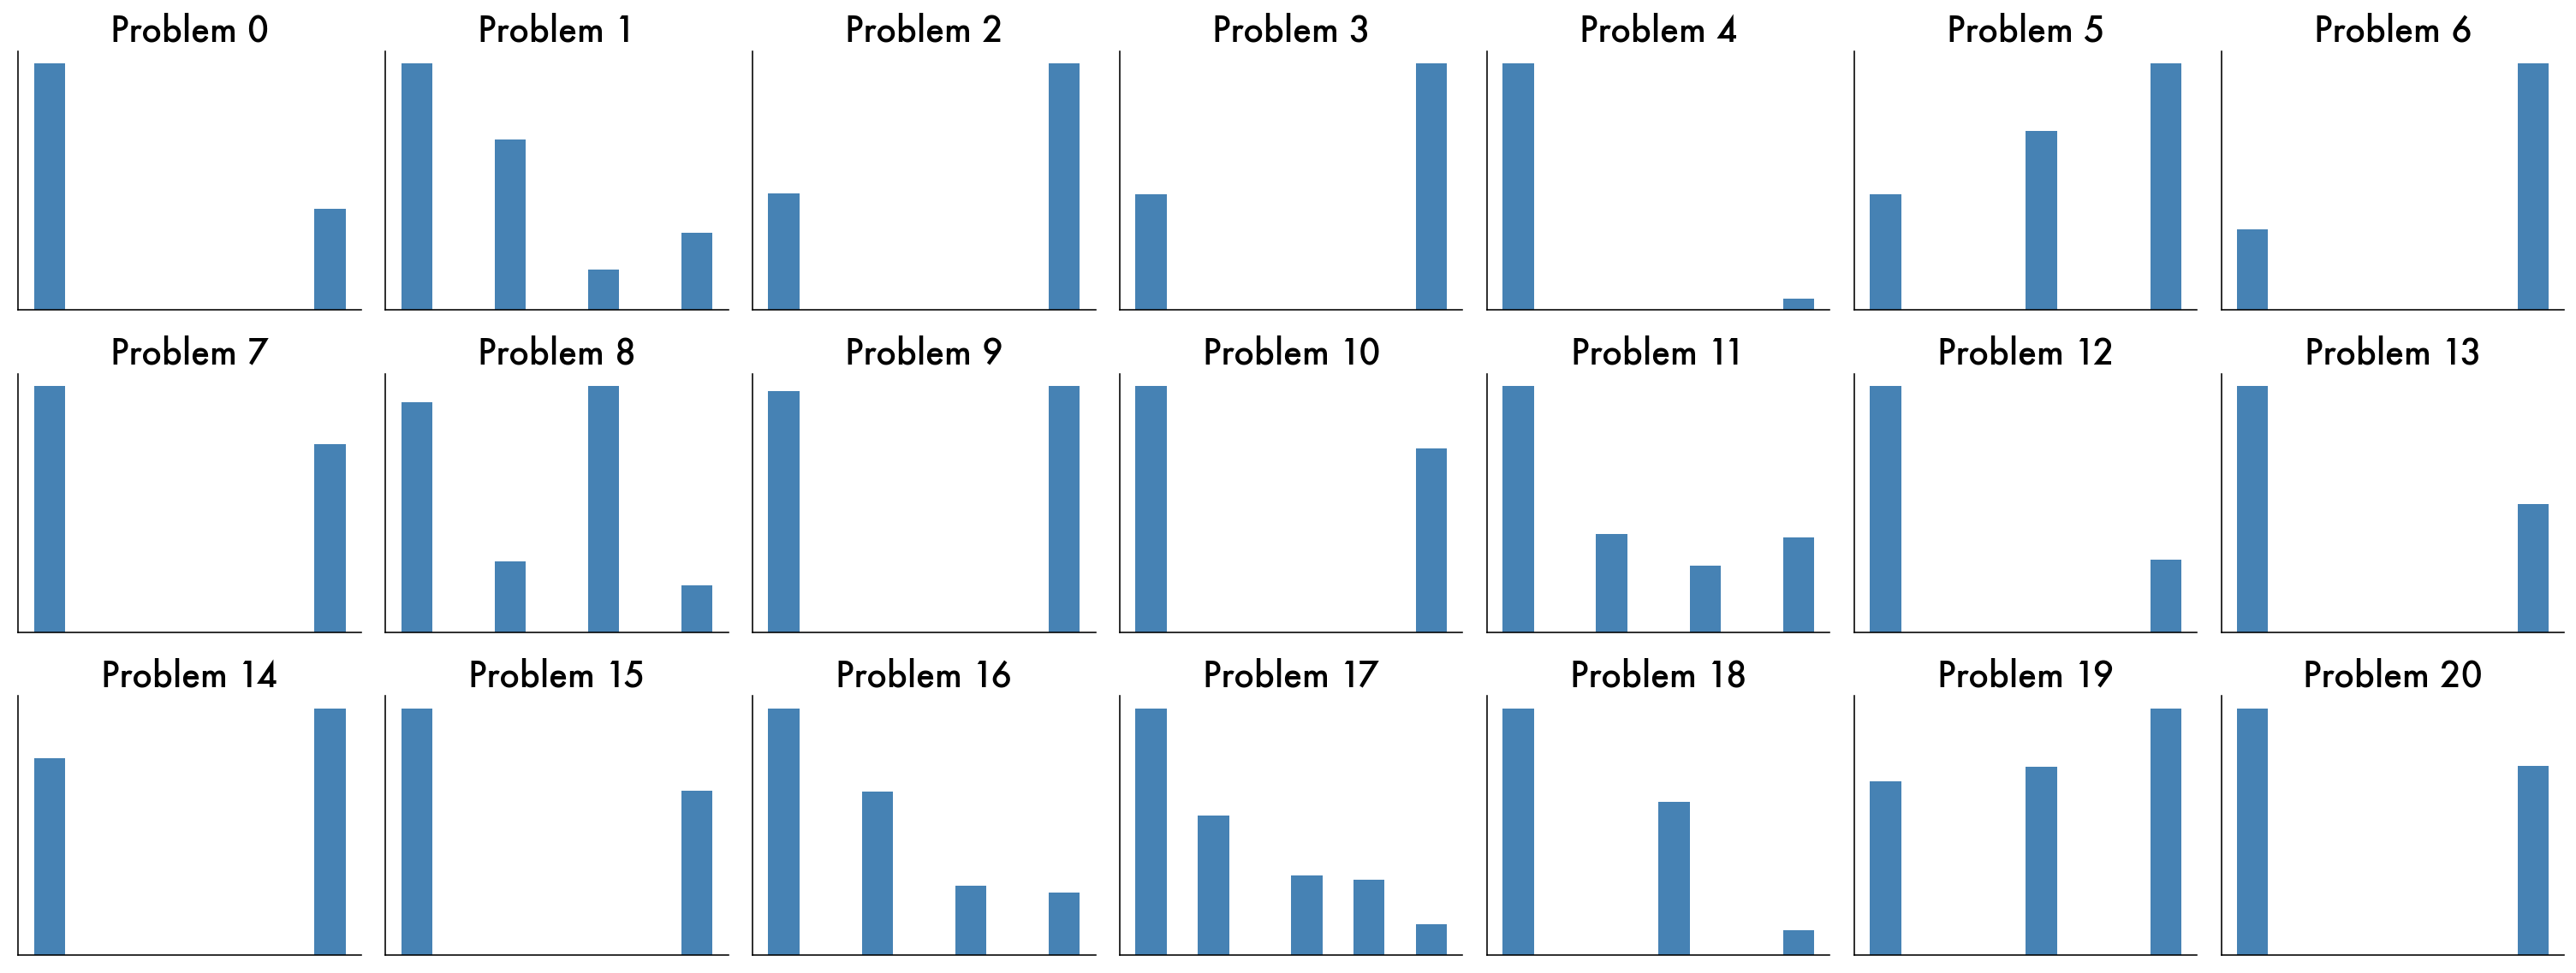

In [4]:
plot_distribution(df)

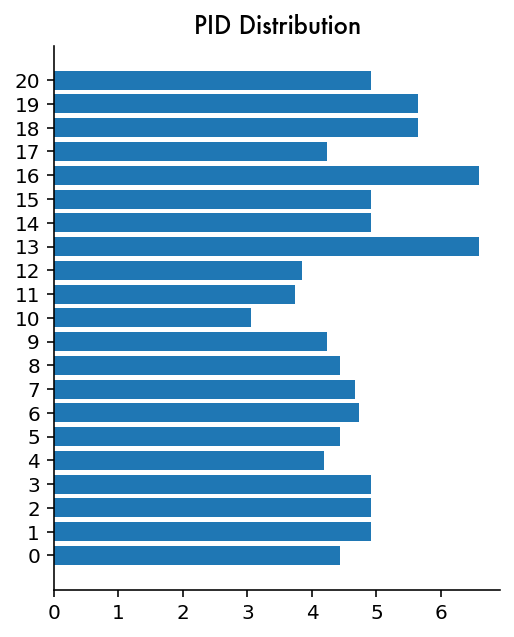

In [5]:
percent_pid = [round(len(df[df['problem_id'] == pid])*100/len(df),2) for pid in range(21)]

fig, ax = plt.subplots(1,1,figsize=(4,5))
ax.barh(range(21), percent_pid)
ax.set_yticks(range(21))
ax.set_title('PID Distribution', fontname = 'Futura')
set_spines(ax)
plt.show()

In [6]:
for pid in [10,11,16,13]:
    print(f"{pid} represents {round(len(df[df['problem_id'] == pid])*100/len(df),2)}% of the data")

10 represents 3.05% of the data
11 represents 3.73% of the data
16 represents 6.59% of the data
13 represents 6.59% of the data


### Observations From Plots Above
1. There are several different classification problems (e.g. binary, three class, etc.)
    - **Potential Solutions:** Creating a different model for each problem type
2. PID 4 and 18 are the most imbalanced
    - 4 is binary classification and 18 is a three class problem
    - **Potential Solutions**: SMOTE or Random Oversampling
3. 13 and 16 represent most of the train and test data set 
    - 13 is binary classification and 16 is a four class problem

## Imbalanced Data Models
<font size="3">As mentioned above, PID 4 and PID 18 are the most unbalanced.
Therefore, we're going to perform SMOTE oversampling on both and create a separate model for these problem ids. </font>

### Problem ID 4

In [41]:
import imblearn


In [37]:
df = pd.read_csv('train_ml2_2021.csv')

X = df.loc[:, df.columns != 'target']
X = X.drop(columns = 'problem_id')

y = df.target.values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [44]:
oversample = imblearn.over_sampling.RandomOverSampler()
X, y = oversample.fit_resample(X_train, y_train)

In [14]:
lazy_classification(10, X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [06:34<00:00, 13.60s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.56,0.65,None,0.58,0.45
XGBClassifier,0.71,0.54,None,0.70,22.19
NearestCentroid,0.51,0.54,None,0.53,0.47
LinearDiscriminantAnalysis,0.60,0.51,None,0.60,1.44
KNeighborsClassifier,0.70,0.50,None,0.69,24.22
BernoulliNB,0.55,0.49,None,0.56,0.43
LGBMClassifier,0.70,0.46,None,0.69,14.04
PassiveAggressiveClassifier,0.55,0.43,None,0.55,2.06
LinearSVC,0.55,0.40,None,0.56,38.19


In [11]:
xtrees_pipe = Pipeline([('classifier', LGBMClassifier())])

In [45]:
xtrees_pipe = Pipeline([('classifier', ExtraTreesClassifier(n_estimators=400))])

In [12]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.9, 0.897, 0.897, 0.892, 0.899]
Average  : 0.897


In [20]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.896, 0.898, 0.903, 0.894, 0.904]
Average  : 0.8991


In [22]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.893, 0.9, 0.906, 0.895, 0.906]
Average  : 0.9001


In [46]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.912, 0.905, 0.911, 0.903, 0.915]
Average  : 0.9094


In [47]:
df_test = pd.read_csv('test0.csv', index_col='obs_id')
X_test = df_test.loc[:,df_test.columns!='target']
X_test = X_test.drop(columns='problem_id')
predict_df = predict_helper(X, y, X_test, None, xtrees_pipe)

In [26]:
predict_df.target.value_counts()

0    1157
1     732
2     130
3      15
4       7
Name: target, dtype: int64

In [48]:
predict_df.target.value_counts()

0    1444
1     566
2      31
Name: target, dtype: int64

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25,random_state=42)
lazy_classification(10, X_train, X_val, y_train, y_val)

In [123]:
X, y, X_train, X_val, y_train, y_val =  get_partitions(val_size=.25, specific_pid = 4)

In [402]:
lazy_classification(10, X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:02<00:00, 11.95it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.63
LinearDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.09
SVC,1.00,1.00,1.00,1.00,0.06
SGDClassifier,1.00,1.00,1.00,1.00,0.04
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.05
RidgeClassifier,1.00,1.00,1.00,1.00,0.04
RandomForestClassifier,1.00,1.00,1.00,1.00,0.16
NearestCentroid,1.00,1.00,1.00,1.00,0.03
LogisticRegression,1.00,1.00,1.00,1.00,0.05


In [10]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25,random_state=42)
lazy_classification(10, X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:07<00:00,  3.64it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,1.99
LogisticRegression,1.00,1.00,1.00,1.00,0.08
XGBClassifier,1.00,1.00,1.00,1.00,0.24
SVC,1.00,1.00,1.00,1.00,0.12
SGDClassifier,1.00,1.00,1.00,1.00,0.06
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.10
RidgeClassifier,1.00,1.00,1.00,1.00,0.07
RandomForestClassifier,1.00,1.00,1.00,1.00,0.32
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.11


### Cross Validation + Manual Hyperparameter Search

In [11]:
xtrees_pipe = Pipeline([('classifier', ExtraTreesClassifier(n_estimators=8, min_samples_leaf = 20, max_depth=1,random_state=42))])

In [12]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.979, 0.987, 0.991, 0.987, 0.979]
Average  : 0.9845


### Predict the Test Set

In [13]:
X_test4 = get_test(X, y, pipe=xtrees_pipe, specific_pid = 4)

In [14]:
X_test4.target.value_counts()

0    82
1     4
Name: target, dtype: int64

###  Problem ID 18

In [37]:
X, y, X_train, X_val, y_train, y_val =  get_partitions(val_size=.15, specific_pid = 18)

In [419]:
lazy_classification(10, X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:07<00:00,  3.80it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.73,0.71,None,0.72,0.82
SGDClassifier,0.75,0.71,None,0.73,0.07
LogisticRegression,0.72,0.71,None,0.71,0.11
LinearDiscriminantAnalysis,0.68,0.68,None,0.67,0.13
GaussianNB,0.65,0.67,None,0.65,0.04
LGBMClassifier,0.68,0.67,None,0.67,1.22
PassiveAggressiveClassifier,0.65,0.67,None,0.65,0.12
LinearSVC,0.65,0.67,None,0.65,0.41
Perceptron,0.65,0.67,None,0.65,0.06


In [38]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.35, stratify=y, random_state=42)
lazy_classification(10, X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.89,0.88,None,0.88,0.26
SVC,0.87,0.87,None,0.87,0.40
NuSVC,0.86,0.86,None,0.86,0.52
XGBClassifier,0.86,0.86,None,0.86,1.06
PassiveAggressiveClassifier,0.85,0.85,None,0.85,0.12
RandomForestClassifier,0.85,0.85,None,0.85,0.55
LGBMClassifier,0.85,0.85,None,0.85,4.14
CalibratedClassifierCV,0.85,0.85,None,0.85,8.10
SGDClassifier,0.85,0.85,None,0.85,0.08


### Cross Validation + Manual Hyperparameter Search

In [55]:
xtrees_pipe = Pipeline([('classifier', ExtraTreesClassifier(n_estimators = 400, max_depth=200, min_samples_leaf=1, random_state=11))])

In [36]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.854, 0.889, 0.875, 0.882, 0.875]
Average  : 0.8746


In [57]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=11)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.889, 0.857, 0.861, 0.871, 0.885]
Average  : 0.8725


### Predict the Test Set

In [58]:
X_test18 = get_test(X, y, pipe=xtrees_pipe, specific_pid = 18)

In [59]:
X_test18.target.value_counts()

0    87
1    22
2     7
Name: target, dtype: int64

In [38]:
X_test18.target.value_counts()

0    87
1    22
2     7
Name: target, dtype: int64

## Partitioned Classification Tasks
<font size="3">Below, we will be creating separate models for binary classification, three class classification, four class classification and five class classification. </font>

### Binary Classification

In [130]:
X, y, X_train, X_val, y_train, y_val =  get_partitions(n_class=2, val_size=.25)

#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

In [125]:
lazy_classification(10, X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [01:55<00:00,  3.98s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.83,0.82,0.82,0.83,3.57
NuSVC,0.83,0.82,0.82,0.83,19.58
XGBClassifier,0.82,0.81,0.81,0.82,4.75
RandomForestClassifier,0.82,0.81,0.81,0.82,4.53
SVC,0.81,0.81,0.81,0.81,22.30
ExtraTreesClassifier,0.81,0.80,0.80,0.81,1.82
KNeighborsClassifier,0.79,0.78,0.78,0.79,6.91
BaggingClassifier,0.78,0.78,0.78,0.78,14.22
AdaBoostClassifier,0.77,0.76,0.76,0.77,7.14


In [131]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.35,random_state=42)
#lazy_classification(10, X_train, X_val, y_train, y_val)

### Cross Validation + Manual Hyperparameter Search

In [11]:
rf_pipe = Pipeline([('classifier', RandomForestClassifier(n_estimators=500, min_samples_leaf=2, max_depth=13, n_jobs=-1, random_state=42))])

In [139]:
from lightgbm import LGBMClassifier

rf_pipe = Pipeline([('classifier', LGBMClassifier(n_estimators=200))])

In [140]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(rf_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.851, 0.842, 0.826, 0.842, 0.849]
Average  : 0.842


In [138]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(rf_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.844, 0.842, 0.82, 0.842, 0.842]
Average  : 0.8382


In [12]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(rf_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.827, 0.824, 0.814, 0.828, 0.814]
Average  : 0.8214


In [132]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(rf_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.823, 0.821, 0.804, 0.812, 0.794]
Average  : 0.8107


### Predict the Test Set

In [141]:
X_test_binary = get_test(X, y, pipe=rf_pipe, n_class=2, specific_pid = None)

In [142]:
X_test_binary.target.value_counts()

0    664
1    559
Name: target, dtype: int64

In [14]:
X_test_binary.target.value_counts()

0    619
1    604
Name: target, dtype: int64

In [15]:
619/(619+604)

0.5061324611610794

In [16]:
595/(595+542)

0.523306948109059

In [277]:
X_test_binary.target.value_counts()

0    595
1    542
Name: target, dtype: int64

## Three Class Classification

In [143]:
X, y, X_train, X_val, y_train, y_val =  get_partitions(n_class=3, filter_out = [18], val_size=.15)

### LazyPredict

In [279]:
lazy_classification(10, X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:16<00:00,  1.73it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.58,0.57,None,0.58,3.46
BaggingClassifier,0.56,0.55,None,0.56,1.73
AdaBoostClassifier,0.56,0.55,None,0.56,1.53
NearestCentroid,0.53,0.54,None,0.53,0.07
NuSVC,0.56,0.54,None,0.55,1.06
XGBClassifier,0.56,0.54,None,0.55,1.74
ExtraTreesClassifier,0.56,0.53,None,0.55,0.50
RandomForestClassifier,0.54,0.53,None,0.54,0.77
DecisionTreeClassifier,0.53,0.52,None,0.53,0.30


In [144]:
oversample = SMOTE('minority')
X, y = oversample.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, stratify=y, random_state=42)
#lazy_classification(10, X_train, X_val, y_train, y_val)

### Cross Validation + Manual Hyperparameter Search

In [147]:
xtrees_pipe = Pipeline([('classifier', ExtraTreesClassifier(n_estimators=500, min_samples_leaf = 1, max_depth=70,random_state=42))])

In [145]:
rf_pipe = Pipeline([('classifier', LGBMClassifier(n_estimators=200))])

In [146]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(rf_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.652, 0.672, 0.704, 0.693, 0.675]
Average  : 0.6794


In [71]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(rf_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.687, 0.733, 0.722, 0.728, 0.681]
Average  : 0.7101


In [148]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.699, 0.722, 0.716, 0.739, 0.675]
Average  : 0.7101


### Predictions on Test Set

In [72]:
X_test_three = get_test(X, y, pipe=rf_pipe, n_class=3, filter_out = [18], specific_pid = None)

In [73]:
X_test_three.target.value_counts()

2    81
1    81
0    46
Name: target, dtype: int64

In [66]:
X_test_three.target.value_counts()

2    83
1    79
0    46
Name: target, dtype: int64

# Four Class Model

In [74]:
X, y, X_train, X_val, y_train, y_val =  get_partitions(n_class=4, filter_out = [18], val_size=.35)

### LazyPredict

In [345]:
lazy_classification(10, X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:29<00:00,  1.02s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.47,0.46,None,0.47,0.10
XGBClassifier,0.52,0.41,None,0.48,3.39
BernoulliNB,0.44,0.40,None,0.44,0.10
LGBMClassifier,0.51,0.39,None,0.47,4.88
NearestCentroid,0.44,0.39,None,0.43,0.07
AdaBoostClassifier,0.47,0.39,None,0.45,2.26
KNeighborsClassifier,0.49,0.39,None,0.46,0.97
LogisticRegression,0.43,0.37,None,0.43,0.23
Perceptron,0.41,0.36,None,0.41,0.22


In [75]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.35, stratify=y, random_state=42)
lazy_classification(10, X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [01:51<00:00,  3.83s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.88,0.88,None,0.88,0.41
SVC,0.83,0.83,None,0.83,6.07
ExtraTreesClassifier,0.82,0.82,None,0.82,1.12
NuSVC,0.82,0.82,None,0.82,7.94
LGBMClassifier,0.80,0.80,None,0.81,19.54
XGBClassifier,0.80,0.80,None,0.80,8.36
RandomForestClassifier,0.79,0.79,None,0.79,2.69
SGDClassifier,0.78,0.78,None,0.78,0.42
LogisticRegression,0.78,0.78,None,0.77,0.81


### Cross Validation + Manual Hyperparameter Search

In [82]:
xtrees_pipe = Pipeline([('classifier', ExtraTreesClassifier(n_estimators=500, min_samples_leaf = 1, max_depth=50,random_state=42))])

In [84]:
xtrees_pipe = Pipeline([('classifier', QuadraticDiscriminantAnalysis())])

In [83]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.786, 0.801, 0.817, 0.813, 0.82]
Average  : 0.8076


In [85]:
cv = ShuffleSplit(n_splits=5, test_size=0.35, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.864, 0.896, 0.869, 0.877, 0.881]
Average  : 0.8775


### Predictions on Test Set

In [86]:
X_test_four = get_test(X, y, pipe=xtrees_pipe, n_class=4, filter_out = [17,18], specific_pid = None)

In [87]:
X_test_four.target.value_counts()

0    406
Name: target, dtype: int64

In [80]:
X_test_four.target.value_counts()

0    254
1     75
2     62
3     15
Name: target, dtype: int64

## Five Class Classification

In [149]:
X, y, X_train, X_val, y_train, y_val =  get_partitions(n_class=5, filter_out = [4,18], val_size=.35)

In [392]:
lazy_classification(10, X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:05<00:00,  5.59it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.44,0.43,None,0.44,0.10
LinearSVC,0.46,0.41,None,0.45,0.23
Perceptron,0.43,0.41,None,0.42,0.06
RidgeClassifierCV,0.46,0.40,None,0.45,0.06
LogisticRegression,0.48,0.40,None,0.47,0.10
RidgeClassifier,0.45,0.39,None,0.45,0.05
NearestCentroid,0.23,0.37,None,0.22,0.03
BernoulliNB,0.24,0.37,None,0.23,0.03
GaussianNB,0.24,0.34,None,0.24,0.03


In [150]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.35, stratify=y, random_state=42)

In [82]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.35, stratify=y, random_state=42)
lazy_classification(10, X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:30<00:00,  1.06s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.91,0.91,None,0.92,0.11
NuSVC,0.91,0.91,None,0.91,0.52
SVC,0.90,0.90,None,0.90,0.44
ExtraTreesClassifier,0.89,0.89,None,0.89,0.29
CalibratedClassifierCV,0.88,0.88,None,0.88,13.45
RandomForestClassifier,0.87,0.87,None,0.87,0.58
Perceptron,0.86,0.86,None,0.86,0.09
LogisticRegression,0.85,0.85,None,0.84,0.23
RidgeClassifierCV,0.85,0.85,None,0.84,0.08


### Cross Validation + Manual Hyperparameter Search

In [165]:
#ccv_pipe  = Pipeline([('classifier', CalibratedClassifierCV())])
xtrees_pipe = Pipeline([('classifier', ExtraTreesClassifier(n_estimators=400, min_samples_leaf =1, max_depth=80,random_state=42))])

In [166]:
cv = ShuffleSplit(n_splits=5, test_size=0.45, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.825, 0.833, 0.819, 0.845, 0.83]
Average  : 0.8304


In [92]:
cv = ShuffleSplit(n_splits=5, test_size=0.45, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.86, 0.833, 0.836, 0.839, 0.874]
Average  : 0.8485


In [84]:
cv = ShuffleSplit(n_splits=5, test_size=0.45, random_state=42)
cv_scores = cross_val_score(xtrees_pipe, X, y, cv=cv)
print(f'CV Scores: {[round(score, 3) for score in cv_scores]}')
print(f'Average  : {round(cv_scores.mean(),4)}')

CV Scores: [0.839, 0.863, 0.851, 0.851, 0.874]
Average  : 0.8556


### Predictions on Test Set

In [167]:
X_test_five = get_test(X, y, pipe=xtrees_pipe, n_class=5, filter_out = [18], specific_pid = None)

In [168]:
X_test_five.target.value_counts()

0    66
4    10
1     9
3     2
2     1
Name: target, dtype: int64

In [129]:
X_test_five.target.value_counts()

0    60
1    12
4    10
3     5
2     1
Name: target, dtype: int64

In [86]:
X_test_five.target.value_counts()

0    65
4    10
1     9
3     3
2     1
Name: target, dtype: int64

## Combining All Predictions

### Verifying Test Class Distributions

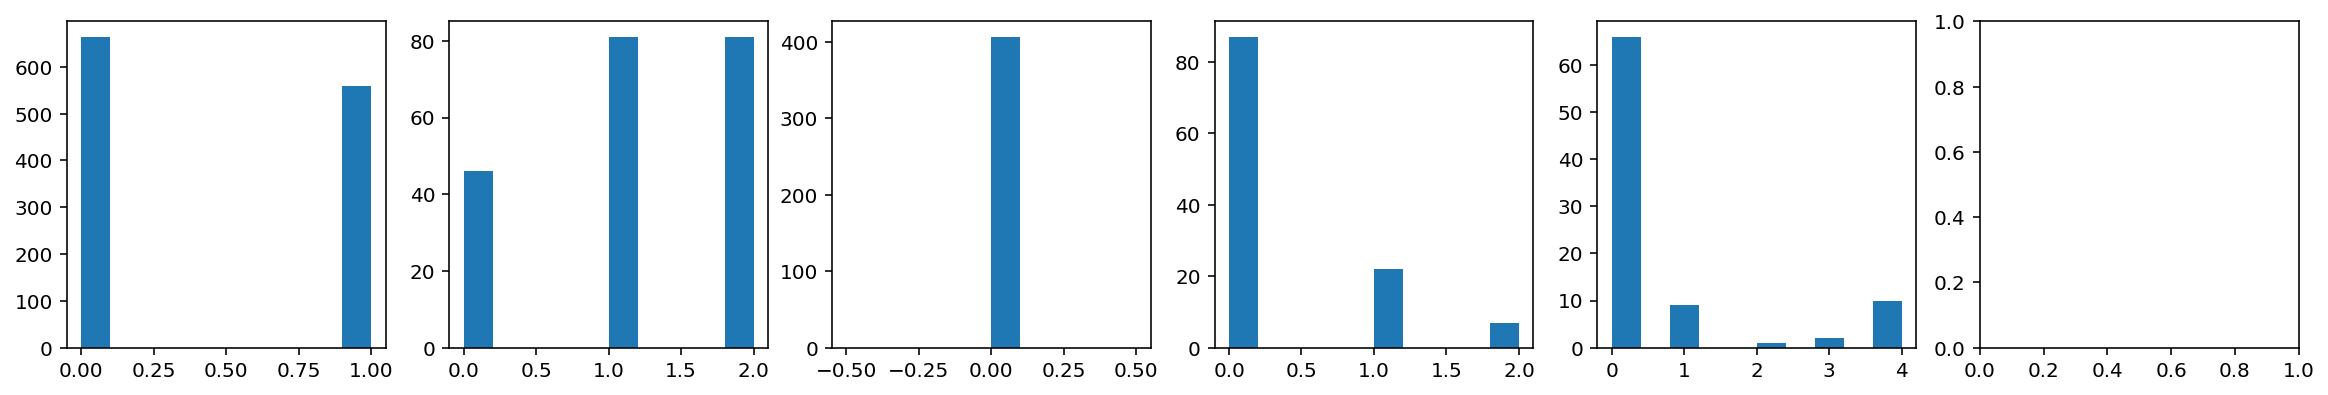

In [170]:
fig, ax =plt.subplots(1, 6, figsize=(20,3))
pred_dfs = [X_test_binary, X_test_three, X_test_four,  X_test18, X_test_five]
for idx, predictions in enumerate(pred_dfs):
    ax[idx].hist(predictions.target)

### Comparing to Train Class Distributions

In [101]:
df_4  = df[df['problem_id']==4]
df_18 = df[df['problem_id']==18]
df_17 = df[df['problem_id']==17]
df_binary = df[df.problem_id.isin(get_pids(df, 2))]
df_three  = df[df.problem_id.isin(get_pids(df, 3))]
df_four   = df[df.problem_id.isin(get_pids(df, 4))]

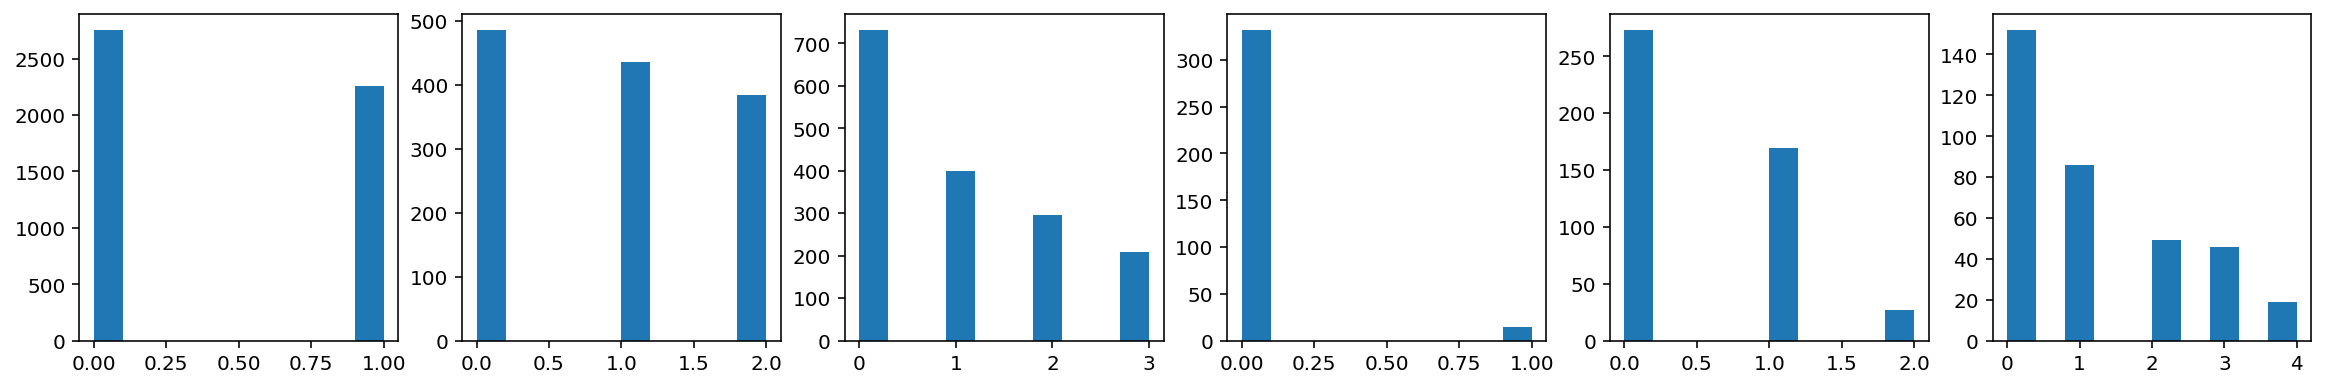

In [102]:
fig, ax =plt.subplots(1, 6, figsize=(20,3))
pred_dfs = [df_binary, df_three, df_four, df_4,  df_18, df_17]
for idx, predictions in enumerate(pred_dfs):
    ax[idx].hist(predictions.target)

In [ ]:
predict_df

In [171]:
result = pd.concat([X_test_binary[['target']], X_test_three[['target']], X_test_four[['target']], X_test18[['target']], X_test_five[['target']]])

In [53]:
predict_df.target.value_counts()/len(predict_df)

0   0.71
1   0.28
2   0.02
Name: target, dtype: float64

In [29]:
df.target.value_counts()/len(df)

0   0.50
1   0.38
2   0.09
3   0.03
4   0.00
Name: target, dtype: float64

In [49]:
result = predict_df.sort_values(by=['obs_id']) 

## Save Results to CSV

In [50]:
result.to_csv('eleventh_submission.csv', index=True)

In [51]:
df9 = pd.read_csv('eleventh_submission.csv')

In [52]:
df9

,obs_id,target
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
2036,2036,0
2037,2037,0
2038,2038,0
2039,2039,0


In [113]:
df8.target.value_counts()

0    1129
1     731
2     153
3      18
4      10
Name: target, dtype: int64

## Verify CSV Predictions

In [36]:
df8.target.value_counts()

NameError: name 'df8' is not defined

In [606]:
df7.target.value_counts()

0    1122
1     745
2     145
3      18
4      11
Name: target, dtype: int64